## Start

Import Library

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk
import text2emotion as te
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\zakyf\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zakyf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Load dataset yang digunakan

In [75]:
data = pd.read_csv('PRDECT-ID Dataset.csv')

Label klasifikasi

In [76]:
def classify_product(row):
    rating = row['Customer Rating']
    sentiment = row['Sentiment']
    emotion = row['Emotion']
    if rating >= 4 and sentiment == 'Positive' and emotion in ['Happy', 'Love']:
        return 'Bagus'
    elif rating < 3 or sentiment == 'Negative' or emotion in ['Anger', 'Fear', 'Sadness']:
        return 'Buruk'
    else:
        return 'Normal'

data['Klasifikasi'] = data.apply(classify_product, axis=1)

## EDA

Analisis distribusi klasifikasi

Distribusi Klasifikasi:
Klasifikasi
Buruk     2821
Bagus     2522
Normal      57
Name: count, dtype: int64


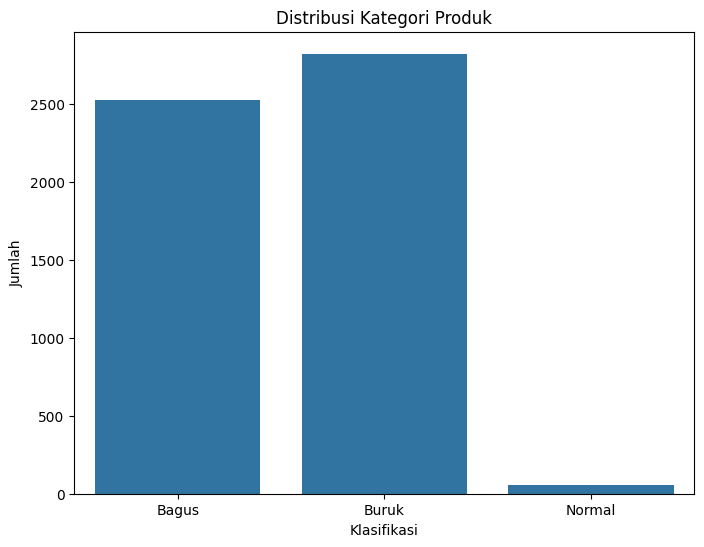

In [77]:
print("Distribusi Klasifikasi:")
print(data['Klasifikasi'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='Klasifikasi', data=data)
plt.title('Distribusi Kategori Produk')
plt.xlabel('Klasifikasi')
plt.ylabel('Jumlah')
plt.show()

Wordcloud ulasan buruk

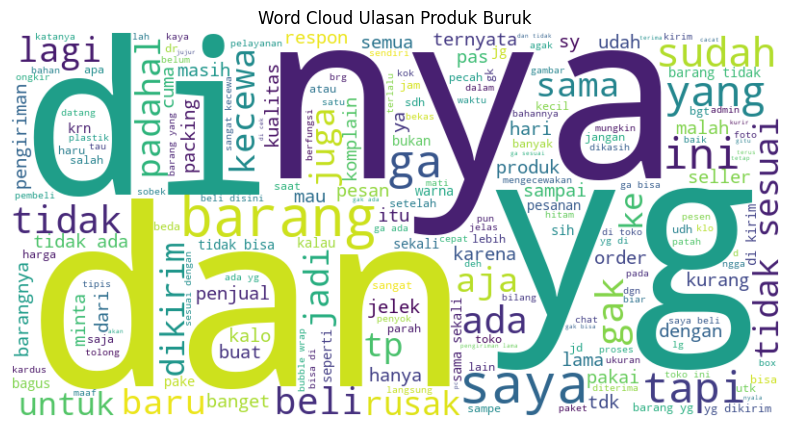

In [78]:
buruk_reviews = data[data['Klasifikasi'] == 'Buruk']['Customer Review'].str.cat(sep=' ')
if buruk_reviews:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(buruk_reviews)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud Ulasan Produk Buruk')
    plt.show()

## Preprocessing

Preprocessing

In [79]:
le_sentiment = LabelEncoder()
le_emotion = LabelEncoder()

data['Sentiment_Encoded'] = le_sentiment.fit_transform(data['Sentiment'])
data['Emotion_Encoded'] = le_emotion.fit_transform(data['Emotion'])

Simpan encoder

In [80]:
joblib.dump(le_sentiment, 'le_sentiment.pkl')
joblib.dump(le_emotion, 'le_emotion.pkl')

['le_emotion.pkl']

Fitur untuk klasifikasi

In [81]:
features = ['Customer Rating', 'Sentiment_Encoded', 'Emotion_Encoded']
X = data[features]
y = data['Klasifikasi']

Normalisasi

In [82]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

Split data

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Modelling

SVM

In [84]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

Evaluasi SVM


Laporan Klasifikasi SVM:
              precision    recall  f1-score   support

       Bagus       1.00      1.00      1.00       513
       Buruk       1.00      1.00      1.00       557
      Normal       1.00      1.00      1.00        10

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080



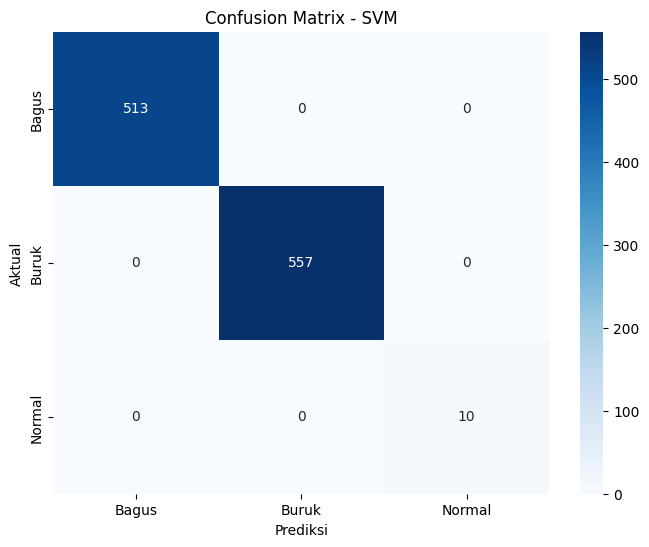

Cross-Validation Scores SVM: [1. 1. 1. 1. 1.]
Rata-rata CV Score SVM: 1.0


In [85]:
print("\nLaporan Klasifikasi SVM:")
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm))

plt.figure(figsize=(8, 6))
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Bagus', 'Buruk', 'Normal'], 
           yticklabels=['Bagus', 'Buruk', 'Normal'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

svm_scores = cross_val_score(svm_model, X_scaled, y, cv=5)
print("Cross-Validation Scores SVM:", svm_scores)
print("Rata-rata CV Score SVM:", svm_scores.mean())

Naive Bayes

In [87]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
joblib.dump(nb_model, 'nb_model.pkl')

['nb_model.pkl']

Evaluasi Naive Bayes


Laporan Klasifikasi Naive Bayes:
              precision    recall  f1-score   support

       Bagus       1.00      1.00      1.00       513
       Buruk       1.00      1.00      1.00       557
      Normal       1.00      1.00      1.00        10

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080



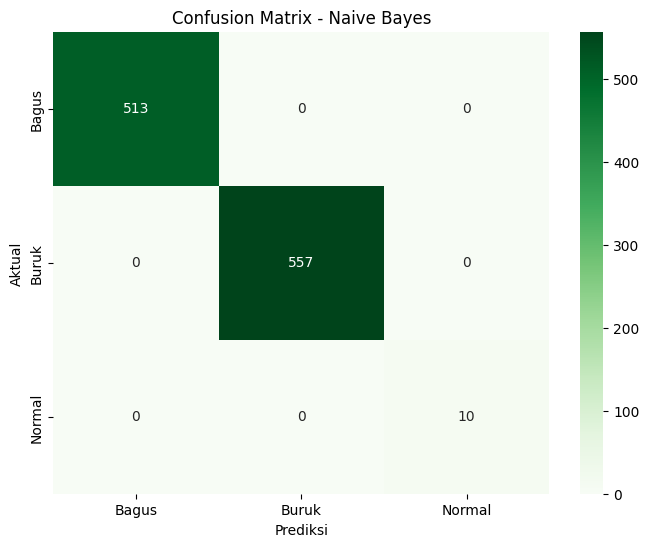

Cross-Validation Scores Naive Bayes: [0.99814815 1.         1.         1.         1.        ]
Rata-rata CV Score Naive Bayes: 0.9996296296296296


In [88]:
print("\nLaporan Klasifikasi Naive Bayes:")
y_pred_nb = nb_model.predict(X_test)
print(classification_report(y_test, y_pred_nb))

plt.figure(figsize=(8, 6))
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens', 
           xticklabels=['Bagus', 'Buruk', 'Normal'], 
           yticklabels=['Bagus', 'Buruk', 'Normal'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

nb_scores = cross_val_score(nb_model, X_scaled, y, cv=5)
print("Cross-Validation Scores Naive Bayes:", nb_scores)
print("Rata-rata CV Score Naive Bayes:", nb_scores.mean())

## Tambahan (prototype sederhana)

Ekstraksi fitur NLP

In [90]:
sid = SentimentIntensityAnalyzer()

def extract_sentiment(review):
    if pd.isna(review):
        return 'Positive'
    scores = sid.polarity_scores(str(review))
    return 'Positive' if scores['compound'] >= 0 else 'Negative'

def extract_emotion(review):
    if pd.isna(review):
        return 'Happy'
    try:
        emotions = te.get_emotion(str(review))
        if not emotions:
            return 'Happy'
        dominant_emotion = max(emotions, key=emotions.get)
        if dominant_emotion in ['Happy', 'Love', 'Anger', 'Fear', 'Sadness']:
            return dominant_emotion
        return 'Happy'
    except:
        return 'Happy'

Generate insight

In [91]:
def generate_insight(klasifikasi, emotion, sentiment, review_text):
    review_text = str(review_text).lower()
    insight = {
        'Klasifikasi': klasifikasi,
        'Kelebihan': [],
        'Kekurangan': [],
        'Saran': ''
    }
    if klasifikasi == 'Bagus':
        insight['Kelebihan'].append(f"Produk mendapat ulasan positif dengan emosi {emotion.lower()}.")
        insight['Saran'] = "Pertahankan kualitas dan promosikan fitur yang disukai."
        if 'mudah' in review_text or 'cepat' in review_text:
            insight['Kelebihan'].append("Pelanggan menyukai kemudahan atau kecepatan produk.")
        if 'baterai' in review_text:
            insight['Kelebihan'].append("Baterai produk mendapat pujian.")
    elif klasifikasi == 'Buruk':
        insight['Kekurangan'].append(f"Produk mendapat ulasan negatif dengan emosi {emotion.lower()}.")
        if 'pengiriman' in review_text:
            insight['Kekurangan'].append("Masalah pengiriman sering disebutkan.")
            insight['Saran'] = "Perbaiki proses pengiriman untuk mengurangi keluhan."
        elif 'kualitas' in review_text or 'rusak' in review_text:
            insight['Kekurangan'].append("Kualitas produk menjadi keluhan utama.")
            insight['Saran'] = "Tinjau kualitas produk."
        else:
            insight['Saran'] = "Analisis ulasan lebih lanjut untuk masalah spesifik."
    else:
        insight['Saran'] = "Tingkatkan fitur produk untuk ulasan lebih positif."
    return insight

Eksekusi

In [92]:
contoh_data_scraped = pd.DataFrame({
    'Product Name': ['Laptop Baru XYZ'],
    'Price': [10000000],
    'Overall Rating': [4.8],
    'Number Sold': [5000],
    'Total Review': [1000],
    'Customer Rating': [5],
    'Customer Review': ['Produk sangat bagus, baterai tahan lama, pengiriman cepat'],
    'Category': ['Computers and Laptops'],
    'Location': ['Jakarta Utara']
})

# Ekstrak fitur NLP untuk data baru
contoh_data_scraped['Sentiment'] = contoh_data_scraped['Customer Review'].apply(extract_sentiment)
contoh_data_scraped['Emotion'] = contoh_data_scraped['Customer Review'].apply(extract_emotion)

# Preprocessing data baru
try:
    contoh_data_scraped['Sentiment_Encoded'] = le_sentiment.transform(contoh_data_scraped['Sentiment'])
except ValueError as e:
    print(f"Error encoding Sentiment: {e}")
    contoh_data_scraped['Sentiment_Encoded'] = [le_sentiment.transform(['Positive'])[0] if x == 'Neutral' else le_sentiment.transform([x])[0] for x in contoh_data_scraped['Sentiment']]

try:
    contoh_data_scraped['Emotion_Encoded'] = le_emotion.transform(contoh_data_scraped['Emotion'])
except ValueError as e:
    print(f"Error encoding Emotion: {e}")
    contoh_data_scraped['Emotion_Encoded'] = [le_emotion.transform(['Happy'])[0] if x not in le_emotion.classes_ else le_emotion.transform([x])[0] for x in contoh_data_scraped['Emotion']]

# Pilih fitur untuk prediksi (hanya Customer Rating, Sentiment_Encoded, Emotion_Encoded)
features = ['Customer Rating', 'Sentiment_Encoded', 'Emotion_Encoded']
contoh_data_features = contoh_data_scraped[features]
contoh_data_scaled = scaler.transform(contoh_data_features)

# Prediksi
prediksi_svm = svm_model.predict(contoh_data_scaled)
prediksi_nb = nb_model.predict(contoh_data_scaled)

print("\nContoh Prediksi untuk Produk Baru (Hasil Scraping):")
print(f"Klasifikasi SVM: {prediksi_svm[0]}")
print(f"Klasifikasi Naive Bayes: {prediksi_nb[0]}")
insight_contoh = generate_insight(
    prediksi_svm[0], 
    contoh_data_scraped['Emotion'][0], 
    contoh_data_scraped['Sentiment'][0], 
    contoh_data_scraped['Customer Review'][0]
)
print("\nInsight untuk Produk Baru:")
print(f"Klasifikasi: {insight_contoh['Klasifikasi']}")
print(f"Kelebihan: {', '.join(insight_contoh['Kelebihan'])}")
print(f"Kekurangan: {', '.join(insight_contoh['Kekurangan'])}")
print(f"Saran: {insight_contoh['Saran']}")



Contoh Prediksi untuk Produk Baru (Hasil Scraping):
Klasifikasi SVM: Bagus
Klasifikasi Naive Bayes: Bagus

Insight untuk Produk Baru:
Klasifikasi: Bagus
Kelebihan: Produk mendapat ulasan positif dengan emosi happy., Pelanggan menyukai kemudahan atau kecepatan produk., Baterai produk mendapat pujian.
Kekurangan: 
Saran: Pertahankan kualitas dan promosikan fitur yang disukai.
